## Testing our pinyin algorithm on clear dictionary data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import html
import urllib
import time
import re
import textdistance
from transliterator import Transliterator as T

table=pd.read_csv('translit_pdf_version.csv',sep=';')

In [9]:
df_pinyin = pd.read_csv('wlc_cd.csv', index_col='id')
df_pinyin = df_pinyin.drop(['lang', 'Unnamed: 6'], axis=1)
df_pinyin.head()

,word,pinyin_final,origin,rus_transcription
id,,,,
0,阿尔申,āěrshén,аршин,аршын
1,阿尔西非(合金),āěrxǐfēi,альсифер,ал’с’иф’эр
2,阿法林,āfǎlín,афалина,афал’ина
3,阿留米特,āliúmǐtè,алюмит,ал’ум’ит
4,阿依尔,āyi'ěr,аил,аил


In [10]:
df_pinyin['origin'] = df_pinyin['origin'].replace(to_replace=r'\(.*\)', value=r'', regex=True)
df_pinyin['pinyin_final'] = df_pinyin['pinyin_final'].replace(to_replace=r'\(.*\)', value=r'', regex=True)
df_pinyin['word'] = df_pinyin['word'].replace(to_replace=r'\(.*\)', value=r'', regex=True)


In [12]:
df_pinyin['Xinhua'] = df_pinyin['origin'].apply(lambda x: T(x, table).output_word)

In [13]:
df_pinyin['levenstein_word'] = df_pinyin.loc[:, ['word', 'Xinhua']].apply(lambda x: textdistance.levenshtein.distance(*x), axis=1)

In [14]:
df_pinyin['Xinhua_phon'] = df_pinyin['rus_transcription'].apply(lambda x: T(x, table).output_word)

In [15]:
df_pinyin['levenstein_phon'] = df_pinyin.loc[:, ['word', 'Xinhua_phon']].apply(lambda x: textdistance.levenshtein.distance(*x), axis=1)


In [16]:
df_pinyin.sort_values(by='levenstein_word')

,word,pinyin_final,origin,rus_transcription,Xinhua,levenstein_word,Xinhua_phon,levenstein_phon
id,,,,,,,,
0,阿尔申,āěrshén,аршин,аршын,阿尔申,0,阿尔申,0
235,诺加塔,nuòjiātǎ,ногата,нагата,诺加塔,0,纳加塔,1
236,诺萨里,nuòsàlǐ,носарь,насар’,诺萨里,0,纳萨尔,2
76,杜塔尔,dùtǎ'ěr,дутар,дутар,杜塔尔,0,杜塔尔,0
245,齐巴尼特,qíbānítè,цибанит,цыбан’ит,齐巴尼特,0,齐班·伊特,3
247,奇尔,qí'ěr,чир,ч’ир,奇尔,0,奇伊尔,1
258,若克,ruòkè,жок,жок,若克,0,若克,0
67,达恰,dáqià,дача,дач’а,达恰,0,达奇阿,2
224,米格,mǐgé,МиГ,м’ик,米格,0,姆伊克,3


In [22]:
lenghts = [len(x) for x in df_pinyin['word']]
aver = sum(lenghts) / len(lenghts)
aver

3.4149484536082473

In [23]:
d = pd.DataFrame(df_pinyin['levenstein_word'].value_counts())

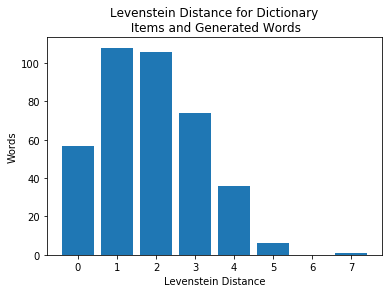

In [24]:
plt.bar(d.index, d.levenstein_word)
plt.title('Levenstein Distance for Dictionary\n Items and Generated Words')
plt.xlabel('Levenstein Distance')
plt.ylabel('Words')
plt.show()

## Character Diversity of the Dataset

In [25]:
a = list(df_pinyin['word'])
a = ''.join(a)
b = list(a)
c = set(b)
len(c)

319

In [26]:
a = list(df_pinyin['Xinhua'])
a = ''.join(a)
b = list(a)
c = set(b)
len(c)

168